In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

Carregamento do data Set

In [2]:
cluster_caminho = r"C:\Users\Administrador\Desktop\TCC\TCC\dataset_rev_SerieCluster.csv"
cluster = pd.read_csv(cluster_caminho, sep =";", encoding= "utf8")
cluster.head()

,Hexagono,Bairro,UP,Mes,Quantidade_passageiros(Y),Numero_Linhas,Populacao,Renda
0,89a88cd8117ffff,Castelo,Abílio Machado,2022-08-01,47,3,835,1402.0
1,89a88cd8183ffff,Castelo,Abílio Machado,2022-08-01,106,4,425,1383.8
2,89a88cd8187ffff,Conjunto Celso Machado,Abílio Machado,2022-08-01,44,1,1178,1249.0
3,89a88cd818fffff,Castelo,Abílio Machado,2022-08-01,73,3,840,1497.6
4,89a88cd8193ffff,Conjunto Celso Machado,Abílio Machado,2022-08-01,117,3,817,1133.0


Análise de Cluster UP Glória

In [3]:
cluster_Gloria = cluster[cluster['UP'] == 'Glória']

In [4]:
ponto_analise = cluster_Gloria[['Numero_Linhas', 'Populacao', 'Renda']]

In [5]:
# Normalizando os dados
scaler = StandardScaler()
features_normalized = scaler.fit_transform(ponto_analise)

In [6]:
n_clusters = max(len(cluster_Gloria['Hexagono'].unique()) // 10, 1)
n_clusters

5

In [7]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_Gloria['Cluster'] = kmeans.fit_predict(features_normalized)
cluster_Gloria
cluster_Gloria.to_excel(r"C:\Users\Administrador\Desktop\TCC\TCC\ClusterGloria.xlsx")

c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrador\AppData\Local\Temp\ipykernel_11212\930230717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_Gloria['Cluster'] = kmeans.fit_predict(features_normalized)


In [8]:
# Estatísticas gerais dos clusters
# Em seguida, agrupe os dados pelo Cluster
cluster_group = cluster_Gloria.groupby('Cluster')

# Calcule as médias para cada cluster
media_passageiros = cluster_group['Quantidade_passageiros(Y)'].mean()
media_linhas = cluster_group['Numero_Linhas'].mean()
media_populacao = cluster_group['Populacao'].mean()
media_renda = cluster_group['Renda'].mean()

# Contar o número de hexágonos em cada cluster
contagem_hexagonos = cluster_group['Hexagono'].count()

# Crie um novo DataFrame com os resultados
resultados = pd.DataFrame({
    'Cluster': media_passageiros.index,
    'Média de Passageiros': media_passageiros.values,
    'Número Médio de Linhas': media_linhas.values,
    'Média de População': media_populacao.values,
    'Média de Renda': media_renda.values,
    'Contagem de Hexágonos': contagem_hexagonos.values
})

# Exibir a tabela de resultados
print(resultados)
resultados.to_excel(r"C:\Users\Administrador\Desktop\TCC\TCC\resumoClusterGloria.xlsx")

   Cluster  Média de Passageiros  Número Médio de Linhas  Média de População  \
0        0            178.503086                2.388889         1622.500000   
1        1            160.305556                4.000000          715.000000   
2        2            128.173333                1.520000         1016.080000   
3        3             79.444444                1.166667          322.666667   
4        4            440.944444                9.000000          458.000000   

   Média de Renda  Contagem de Hexágonos  
0      640.588889                    324  
1     1430.050000                     36  
2      607.936000                    450  
3      438.933333                    108  
4      757.400000                     18  


A criação do Cluster, permite uma análise detalhada sobre a análise, unindo amostras homogêneas internamente e heterogeneas fora do grupo.

# GLÓRIA CLUSTER 0

In [9]:

cluster_0_data = cluster_Gloria[cluster_Gloria['Cluster'] == 0].groupby('Mes')['Quantidade_passageiros(Y)'].mean().reset_index()
cluster_0_data['Mes'] = pd.to_datetime(cluster_0_data['Mes'])
cluster_0_data.sort_values('Mes', inplace=True)
cluster_0_data.to_excel(r"C:\Users\Administrador\Desktop\TCC\TCC\dataset_gloria.xlsx")


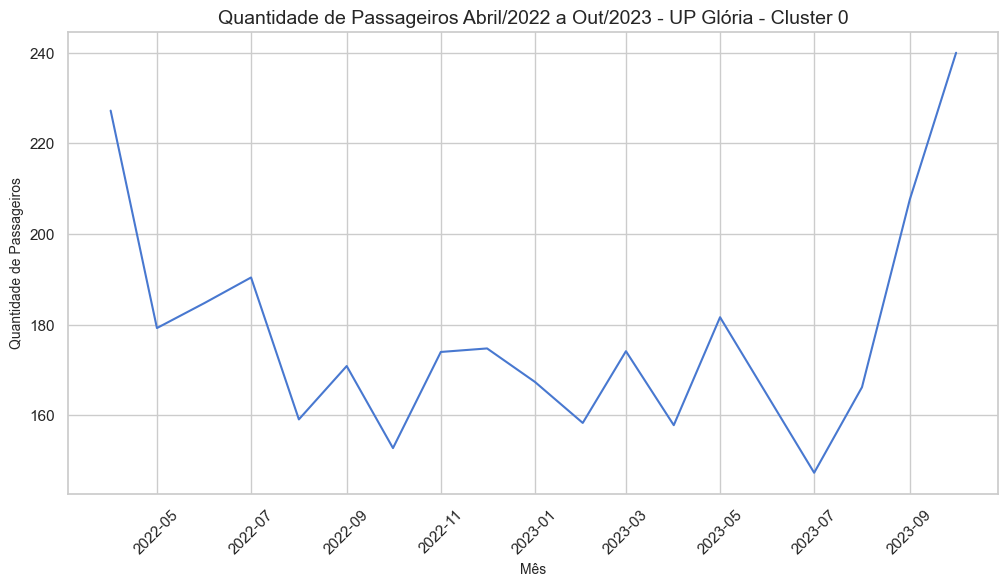

In [10]:

# Agregando os dados por mês para ter uma visão geral da série temporal
monthly_data =cluster_0_data.groupby('Mes').agg({'Quantidade_passageiros(Y)': 'sum'}).reset_index()

# Ajustando o estilo e a paleta de cores
sns.set(style="whitegrid", palette="muted")

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='Mes', y='Quantidade_passageiros(Y)', data=monthly_data)

# Ajustando o título e as etiquetas
plt.title('Quantidade de Passageiros Abril/2022 a Out/2023 - UP Glória - Cluster 0', fontsize=14)
plt.xlabel('Mês', fontsize=10)
plt.ylabel('Quantidade de Passageiros', fontsize=10)

# Melhorando a legibilidade das datas no eixo x
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# Mostrando o gráfico
plt.show()

Análise se a série é estacionária

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.stattools import adfuller

In [12]:
# Aplicando o teste de Dickey-Fuller aumentado (ADF) na série temporal do cluster 0
adf_test_cluster_0_gloria = adfuller(cluster_0_data['Quantidade_passageiros(Y)'])

# Extraindo os resultados do teste
adf_statistic_cluster_0_gloria = adf_test_cluster_0_gloria[0]
p_value_cluster_0_gloria = adf_test_cluster_0_gloria[1]
critical_values_cluster_0_gloria = adf_test_cluster_0_gloria[4]

adf_result_cluster_0_gloria = {
    "ADF Statistic": adf_statistic_cluster_0_gloria,
    "p-value": p_value_cluster_0_gloria,
    "Critical Values": critical_values_cluster_0_gloria
}

adf_result_cluster_0_gloria

{'ADF Statistic': -29.561265540194505,
 'p-value': 0.0,
 'Critical Values': {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}}

Os resultados do teste de Dickey-Fuller aumentado (ADF) :

Estatística ADF é -29.5613. Comprova que a série é estacionária.

Valor-p: O valor-p é 0.0 - estatisticamente negativo.

Valores Críticos: Para os níveis de confiança 1%, 5% e 10%, os valores críticos são -4.3316, -3.2330 e -2.7487







In [13]:
#MODELO SARIMA

In [14]:
cluster_0_data

,Mes,Quantidade_passageiros(Y)
0,2022-04-01,227.222222
1,2022-05-01,179.222222
2,2022-06-01,184.777778
3,2022-07-01,190.388889
4,2022-08-01,159.055556
5,2022-09-01,170.833333
6,2022-10-01,152.722222
7,2022-11-01,173.944444
8,2022-12-01,174.722222
9,2023-01-01,167.333333


In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajuste do modelo SARIMA com os dados do exemplo
modelo_sarimax = SARIMAX(cluster_0_data['Quantidade_passageiros(Y)'], 
                          order=(1, 0, 0), 
                          trend='n')
resultado_sarimax = modelo_sarimax.fit()

# Resumo do modelo
summary = resultado_sarimax.summary()
summary

c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Quantidade_passageiros(Y)   No. Observations:                   18
Model:                      SARIMAX(1, 0, 2)   Log Likelihood                 -85.406
Date:                       Mon, 22 Jan 2024   AIC                            178.811
Time:                               09:55:52   BIC                            182.373
Sample:                                    0   HQIC                           179.302
                                        - 18                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9826      0.072     13.627      0.000       0.841       1.124
ma.L1          0.2846      6.329      0.045      0.964     -12.120      12.689
ma.L2          0.9981     44.125      0.023      0.982     -85.485      87.481
sigma2       457.2451   2.02e+04      0.023      0.982   -3.91e+04       4e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.97   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.32   Prob(JB):                         0.84
Heteroskedasticity (H):               0.92   Skew:                            -0.31
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

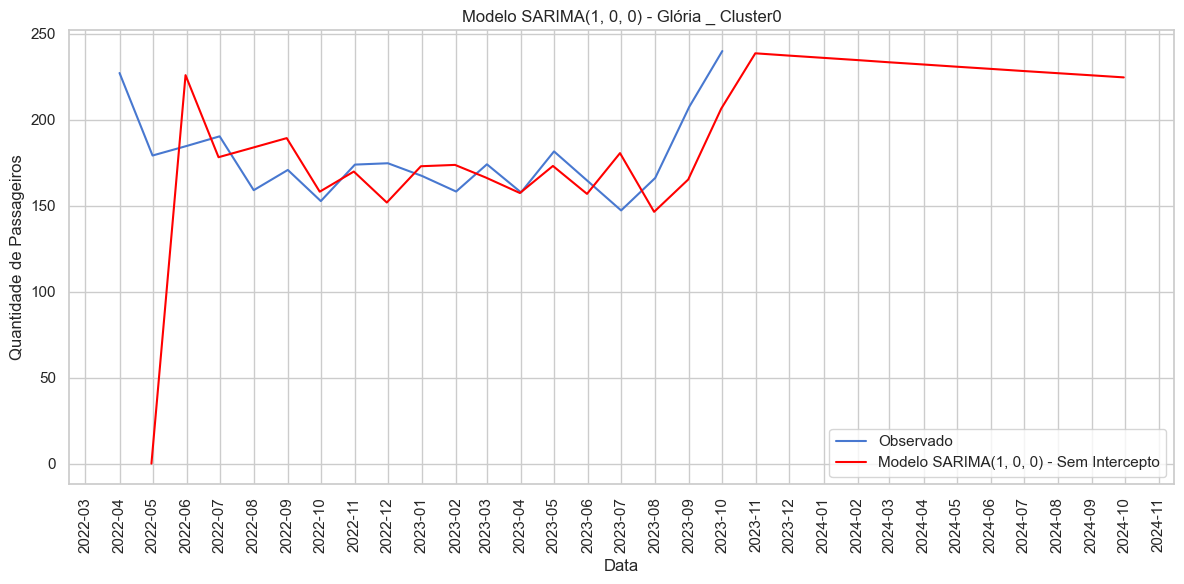

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Suponhamos que 'cluster_0_data' é seu DataFrame e possui colunas 'Mes' e 'Quantidade_passageiros(Y)'
# Ajustando o modelo SARIMA aos dados observados
modelo_sarimax = SARIMAX(cluster_0_data['Quantidade_passageiros(Y)'], 
                          order=(1, 0, 0), 
                          seasonal_order=(0, 0, 0, 0), 
                          trend='n')
resultado_sarimax = modelo_sarimax.fit()

# Definindo o número de períodos a serem previstos além da série existente
periodos_a_prever = 12

# Realizando a previsão para o período existente e adicional
# A previsão começa do primeiro ponto de dados e estende-se além do último ponto observado
previsoes_ext = resultado_sarimax.predict(start=0, 
                                          end=len(cluster_0_data) - 1 + periodos_a_prever, 
                                          dynamic=False)

# Criando um intervalo de datas que inclui o período observado e o período de previsão
novas_datas = pd.date_range(start=cluster_0_data['Mes'].iloc[0], 
                            periods=len(cluster_0_data) + periodos_a_prever, 
                            freq='M')

# Plotando os dados observados e as previsões
plt.figure(figsize=(12, 6))
plt.plot(cluster_0_data['Mes'], cluster_0_data['Quantidade_passageiros(Y)'], label='Observado')
plt.plot(novas_datas, previsoes_ext, label='Modelo SARIMA(1, 0, 0) - Sem Intercepto', color='red')
plt.title('Modelo SARIMA(1, 0, 0) - Glória _ Cluster0')
plt.xlabel('Data')
plt.ylabel('Quantidade de Passageiros')
plt.legend()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout() # Isso pode ajudar se as datas estiverem sobrepostas
plt.show()

# CLUSTER 1 UP GLÓRIA

In [17]:

cluster_1_data = cluster_Gloria[cluster_Gloria['Cluster'] == 1].groupby('Mes')['Quantidade_passageiros(Y)'].mean().reset_index()
cluster_1_data['Mes'] = pd.to_datetime(cluster_1_data['Mes'])
cluster_1_data.sort_values('Mes', inplace=True)


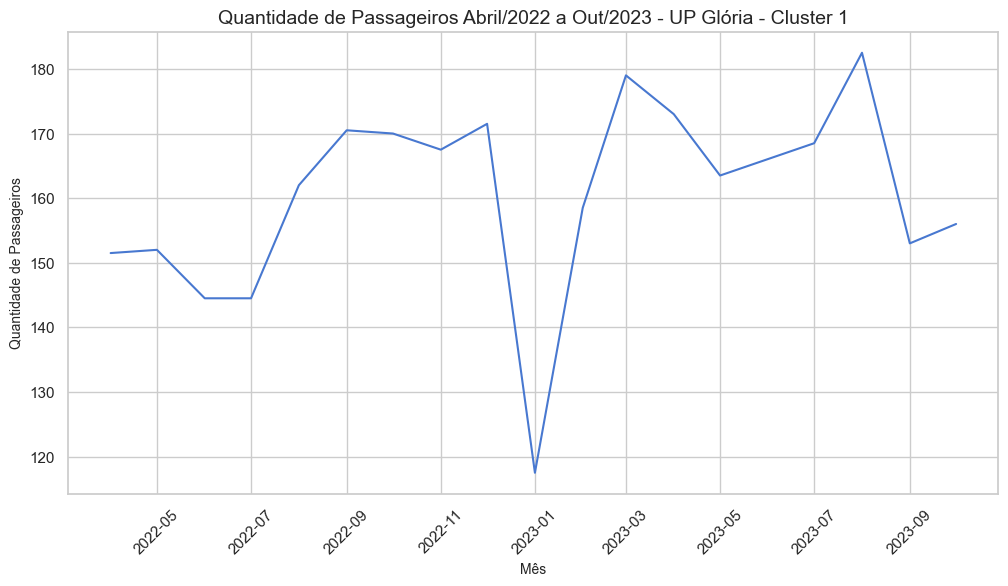

In [18]:

# Agregando os dados por mês para ter uma visão geral da série temporal
monthly_data =cluster_1_data.groupby('Mes').agg({'Quantidade_passageiros(Y)': 'sum'}).reset_index()

# Ajustando o estilo e a paleta de cores
sns.set(style="whitegrid", palette="muted")

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='Mes', y='Quantidade_passageiros(Y)', data=monthly_data)

# Ajustando o título e as etiquetas
plt.title('Quantidade de Passageiros Abril/2022 a Out/2023 - UP Glória - Cluster 1', fontsize=14)
plt.xlabel('Mês', fontsize=10)
plt.ylabel('Quantidade de Passageiros', fontsize=10)

# Melhorando a legibilidade das datas no eixo x
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# Mostrando o gráfico
plt.show()

In [19]:
# Aplicando o teste de Dickey-Fuller aumentado (ADF) na série temporal do cluster 0
adf_test_cluster_1_gloria = adfuller(cluster_1_data['Quantidade_passageiros(Y)'])

# Extraindo os resultados do teste
adf_statistic_cluster_1_gloria = adf_test_cluster_1_gloria[0]
p_value_cluster_1_gloria = adf_test_cluster_1_gloria[1]
critical_values_cluster_1_gloria = adf_test_cluster_1_gloria[4]

adf_result_cluster_1_gloria = {
    "ADF Statistic": adf_statistic_cluster_1_gloria,
    "p-value": p_value_cluster_1_gloria,
    "Critical Values": critical_values_cluster_1_gloria
}

adf_result_cluster_1_gloria

{'ADF Statistic': -3.346131869798783,
 'p-value': 0.012938169651345173,
 'Critical Values': {'1%': -3.889265672705068,
  '5%': -3.0543579727254224,
  '10%': -2.66698384083045}}

In [20]:
# Ajuste do modelo SARIMA com os dados do exemplo
modelo_sarimax = SARIMAX(cluster_1_data['Quantidade_passageiros(Y)'], 
                          order=(1, 0, 0), 
                          trend='n')
resultado_sarimax = modelo_sarimax.fit()

# Resumo do modelo
summary = resultado_sarimax.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Quantidade_passageiros(Y)   No. Observations:                   18
Model:                      SARIMAX(1, 0, 0)   Log Likelihood                 -81.348
Date:                       Mon, 22 Jan 2024   AIC                            166.695
Time:                               09:09:32   BIC                            168.476
Sample:                                    0   HQIC                           166.941
                                        - 18                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9918      0.034     29.295      0.000       0.925       1.058
sigma2       392.4253    113.543      3.456      0.001     169.885     614.966
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):                 4.73
Prob(Q):                              0.19   Prob(JB):                         0.09
Heteroskedasticity (H):               1.35   Skew:                            -0.87
Prob(H) (two-sided):                  0.73   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

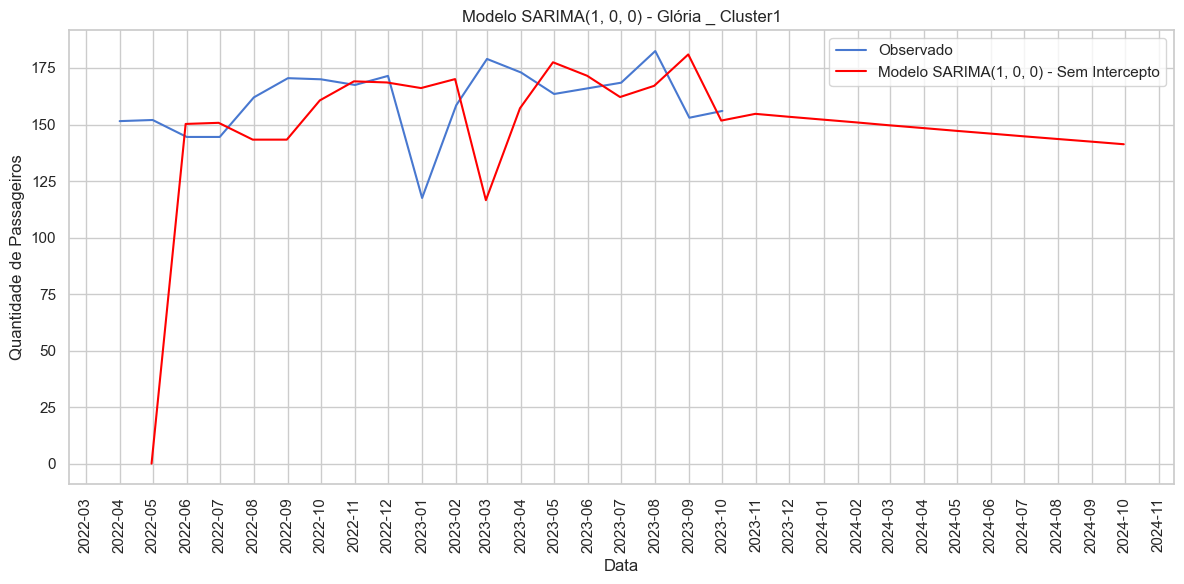

In [21]:
# Suponhamos que 'cluster_0_data' é seu DataFrame e possui colunas 'Mes' e 'Quantidade_passageiros(Y)'
# Ajustando o modelo SARIMA aos dados observados
modelo_sarimax = SARIMAX(cluster_1_data['Quantidade_passageiros(Y)'], 
                          order=(1, 0, 0), 
                          seasonal_order=(0, 0, 0, 0), 
                          trend='n')
resultado_sarimax = modelo_sarimax.fit()

# Definindo o número de períodos a serem previstos além da série existente
periodos_a_prever = 12

# Realizando a previsão para o período existente e adicional
# A previsão começa do primeiro ponto de dados e estende-se além do último ponto observado
previsoes_ext = resultado_sarimax.predict(start=0, 
                                          end=len(cluster_1_data) - 1 + periodos_a_prever, 
                                          dynamic=False)

# Criando um intervalo de datas que inclui o período observado e o período de previsão
novas_datas = pd.date_range(start=cluster_1_data['Mes'].iloc[0], 
                            periods=len(cluster_1_data) + periodos_a_prever, 
                            freq='M')

# Plotando os dados observados e as previsões
plt.figure(figsize=(12, 6))
plt.plot(cluster_0_data['Mes'], cluster_1_data['Quantidade_passageiros(Y)'], label='Observado')
plt.plot(novas_datas, previsoes_ext, label='Modelo SARIMA(1, 0, 0) - Sem Intercepto', color='red')
plt.title('Modelo SARIMA(1, 0, 0) - Glória _ Cluster1')
plt.xlabel('Data')
plt.ylabel('Quantidade de Passageiros')
plt.legend()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout() # Isso pode ajudar se as datas estiverem sobrepostas
plt.show()

In [22]:
cluster_2_data = cluster_Gloria[cluster_Gloria['Cluster'] == 2].groupby('Mes')['Quantidade_passageiros(Y)'].mean().reset_index()
cluster_2_data['Mes'] = pd.to_datetime(cluster_2_data['Mes'])
cluster_2_data.sort_values('Mes', inplace=True)


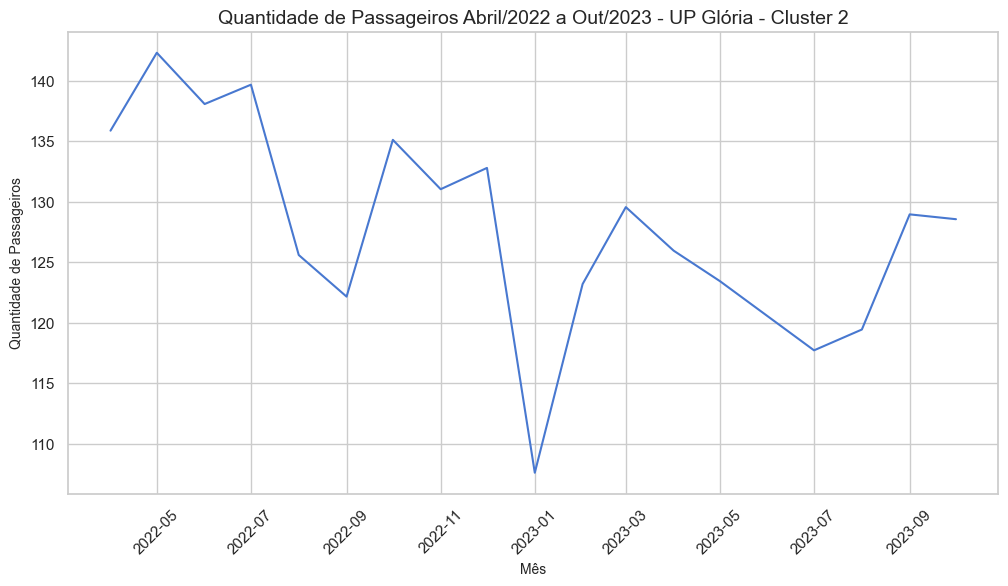

In [23]:
# Agregando os dados por mês para ter uma visão geral da série temporal
monthly_data =cluster_2_data.groupby('Mes').agg({'Quantidade_passageiros(Y)': 'sum'}).reset_index()

# Ajustando o estilo e a paleta de cores
sns.set(style="whitegrid", palette="muted")

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='Mes', y='Quantidade_passageiros(Y)', data=monthly_data)

# Ajustando o título e as etiquetas
plt.title('Quantidade de Passageiros Abril/2022 a Out/2023 - UP Glória - Cluster 2', fontsize=14)
plt.xlabel('Mês', fontsize=10)
plt.ylabel('Quantidade de Passageiros', fontsize=10)

# Melhorando a legibilidade das datas no eixo x
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# Mostrando o gráfico
plt.show()

In [24]:
# Aplicando o teste de Dickey-Fuller aumentado (ADF) na série temporal do cluster 0
adf_test_cluster_2_gloria = adfuller(cluster_2_data['Quantidade_passageiros(Y)'])

# Extraindo os resultados do teste
adf_statistic_cluster_2_gloria = adf_test_cluster_2_gloria[0]
p_value_cluster_2_gloria = adf_test_cluster_2_gloria[1]
critical_values_cluster_2_gloria = adf_test_cluster_2_gloria[4]

adf_result_cluster_2_gloria = {
    "ADF Statistic": adf_statistic_cluster_2_gloria,
    "p-value": p_value_cluster_2_gloria,
    "Critical Values": critical_values_cluster_2_gloria
}

adf_result_cluster_2_gloria

{'ADF Statistic': -2.7551545738754344,
 'p-value': 0.06497063674264567,
 'Critical Values': {'1%': -4.068853732362312,
  '5%': -3.1271488757396453,
  '10%': -2.7017297633136095}}

In [55]:
# Ajuste do modelo SARIMA com os dados do exemplo
modelo_sarimax = SARIMAX(cluster_2_data['Quantidade_passageiros(Y)'], 
                          order=(1, 1, 0), 
                          trend='n')
resultado_sarimax = modelo_sarimax.fit()

# Resumo do modelo
summary = resultado_sarimax.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Quantidade_passageiros(Y)   No. Observations:                   18
Model:                      SARIMAX(1, 1, 0)   Log Likelihood                 -61.595
Date:                       Mon, 22 Jan 2024   AIC                            127.190
Time:                               10:37:30   BIC                            128.857
Sample:                                    0   HQIC                           127.356
                                        - 18                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2848      0.274     -1.038      0.299      -0.822       0.253
sigma2        81.7439     22.821      3.582      0.000      37.015     126.473
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 2.79
Prob(Q):                              0.69   Prob(JB):                         0.25
Heteroskedasticity (H):               0.38   Skew:                            -0.89
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

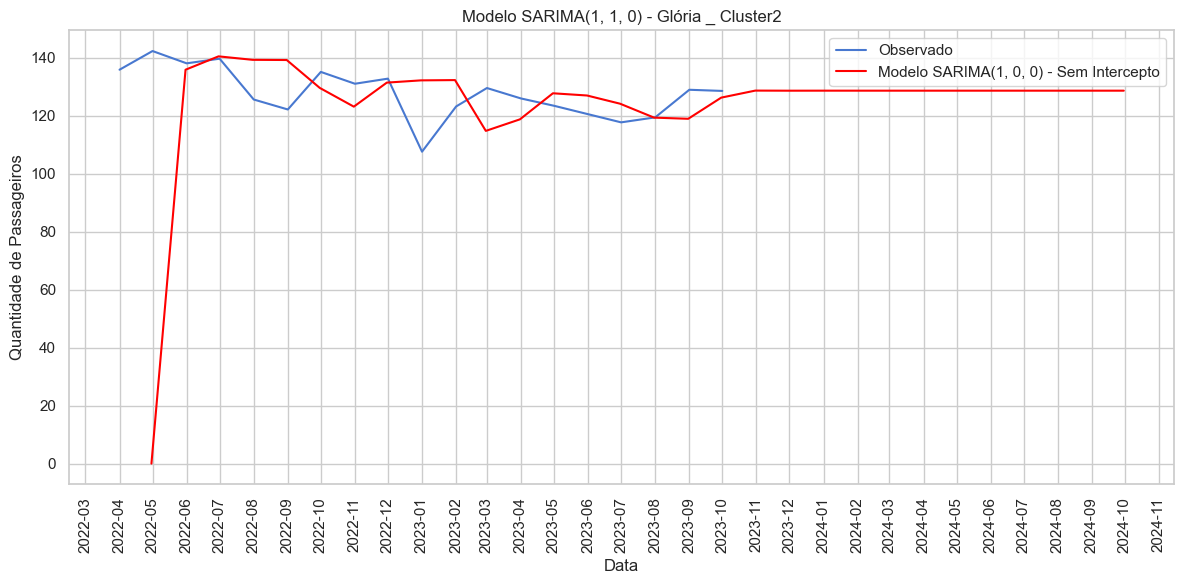

In [50]:
modelo_sarimax = SARIMAX(cluster_2_data['Quantidade_passageiros(Y)'], 
                          order=(1, 1, 0), 
                          seasonal_order=(0, 0, 0, 0), 
                          trend='n')
resultado_sarimax = modelo_sarimax.fit()

# Definindo o número de períodos a serem previstos além da série existente
periodos_a_prever = 12

# Realizando a previsão para o período existente e adicional
# A previsão começa do primeiro ponto de dados e estende-se além do último ponto observado
previsoes_ext = resultado_sarimax.predict(start=0, 
                                          end=len(cluster_2_data) - 1 + periodos_a_prever, 
                                          dynamic=False)

# Criando um intervalo de datas que inclui o período observado e o período de previsão
novas_datas = pd.date_range(start=cluster_2_data['Mes'].iloc[0], 
                            periods=len(cluster_2_data) + periodos_a_prever, 
                            freq='M')

# Plotando os dados observados e as previsões
plt.figure(figsize=(12, 6))
plt.plot(cluster_2_data['Mes'], cluster_2_data['Quantidade_passageiros(Y)'], label='Observado')
plt.plot(novas_datas, previsoes_ext, label='Modelo SARIMA(1, 0, 0) - Sem Intercepto', color='red')
plt.title('Modelo SARIMA(1, 1, 0) - Glória _ Cluster2')
plt.xlabel('Data')
plt.ylabel('Quantidade de Passageiros')
plt.legend()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout() # Isso pode ajudar se as datas estiverem sobrepostas
plt.show()

# Cluster 3

In [41]:
cluster_3_data = cluster_Gloria[cluster_Gloria['Cluster'] == 3].groupby('Mes')['Quantidade_passageiros(Y)'].mean().reset_index()
cluster_3_data['Mes'] = pd.to_datetime(cluster_3_data['Mes'])
cluster_3_data.sort_values('Mes', inplace=True)


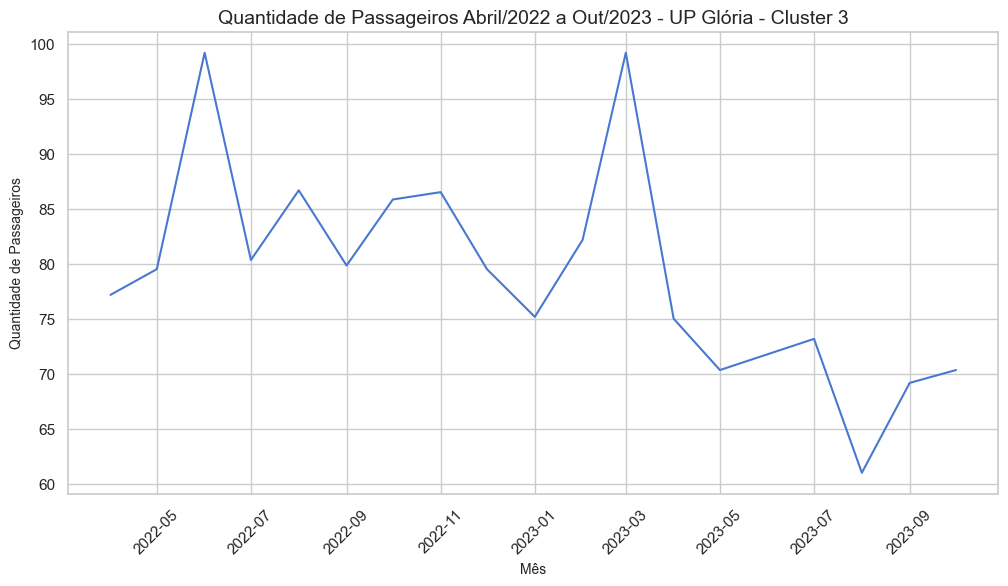

In [42]:
# Agregando os dados por mês para ter uma visão geral da série temporal
monthly_data =cluster_3_data.groupby('Mes').agg({'Quantidade_passageiros(Y)': 'sum'}).reset_index()

# Ajustando o estilo e a paleta de cores
sns.set(style="whitegrid", palette="muted")

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='Mes', y='Quantidade_passageiros(Y)', data=monthly_data)

# Ajustando o título e as etiquetas
plt.title('Quantidade de Passageiros Abril/2022 a Out/2023 - UP Glória - Cluster 3', fontsize=14)
plt.xlabel('Mês', fontsize=10)
plt.ylabel('Quantidade de Passageiros', fontsize=10)

# Melhorando a legibilidade das datas no eixo x
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# Mostrando o gráfico
plt.show()

In [43]:
# Aplicando o teste de Dickey-Fuller aumentado (ADF) na série temporal do cluster 0
adf_test_cluster_3_gloria = adfuller(cluster_3_data['Quantidade_passageiros(Y)'])

# Extraindo os resultados do teste
adf_statistic_cluster_3_gloria = adf_test_cluster_3_gloria[0]
p_value_cluster_3_gloria = adf_test_cluster_3_gloria[1]
critical_values_cluster_3_gloria = adf_test_cluster_3_gloria[4]

adf_result_cluster_3_gloria = {
    "ADF Statistic": adf_statistic_cluster_3_gloria,
    "p-value": p_value_cluster_3_gloria,
    "Critical Values": critical_values_cluster_3_gloria
}

adf_result_cluster_3_gloria

{'ADF Statistic': -2.6329166290137276,
 'p-value': 0.08638309596645827,
 'Critical Values': {'1%': -3.889265672705068,
  '5%': -3.0543579727254224,
  '10%': -2.66698384083045}}

In [54]:
# Ajuste do modelo SARIMA com os dados do exemplo
modelo_sarimax = SARIMAX(cluster_3_data['Quantidade_passageiros(Y)'], 
                          order=(1, 1, 0), 
                          trend='n')
resultado_sarimax = modelo_sarimax.fit()

# Resumo do modelo
summary = resultado_sarimax.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Quantidade_passageiros(Y)   No. Observations:                   18
Model:                      SARIMAX(1, 1, 0)   Log Likelihood                 -63.670
Date:                       Mon, 22 Jan 2024   AIC                            131.341
Time:                               10:34:21   BIC                            133.007
Sample:                                    0   HQIC                           131.506
                                        - 18                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3807      0.195     -1.953      0.051      -0.763       0.001
sigma2       103.9092     38.350      2.709      0.007      28.744     179.074
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.53   Prob(JB):                         0.75
Heteroskedasticity (H):               1.12   Skew:                             0.45
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

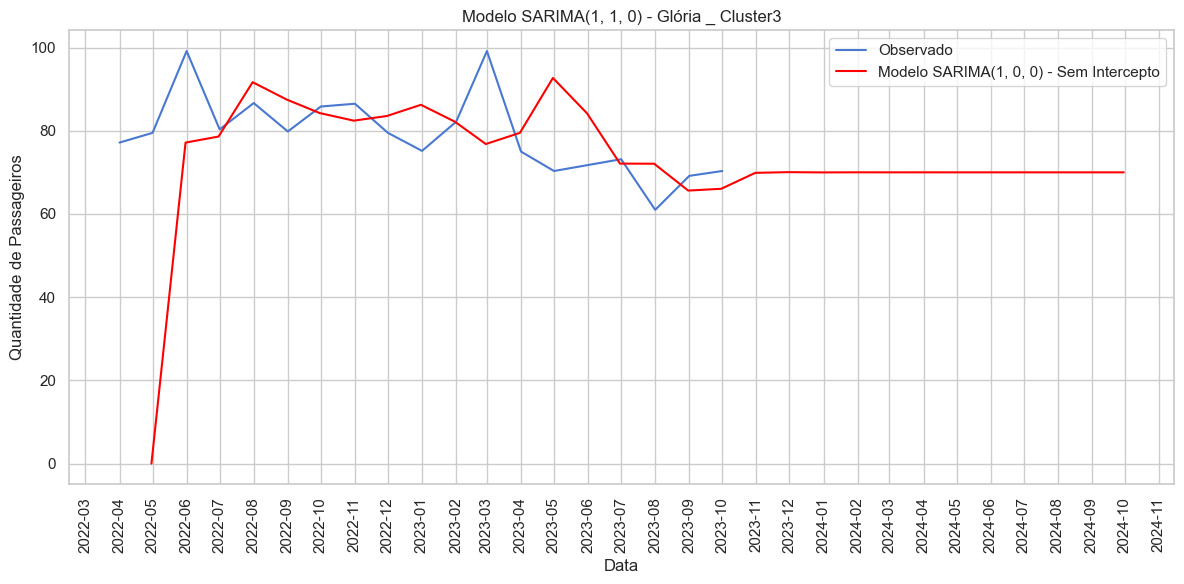

In [49]:
modelo_sarimax = SARIMAX(cluster_3_data['Quantidade_passageiros(Y)'], 
                          order=(1, 1, 0), 
                          seasonal_order=(0, 0, 0, 0), 
                          trend='n')
resultado_sarimax = modelo_sarimax.fit()

# Definindo o número de períodos a serem previstos além da série existente
periodos_a_prever = 12

# Realizando a previsão para o período existente e adicional
# A previsão começa do primeiro ponto de dados e estende-se além do último ponto observado
previsoes_ext = resultado_sarimax.predict(start=0, 
                                          end=len(cluster_3_data) - 1 + periodos_a_prever, 
                                          dynamic=False)

# Criando um intervalo de datas que inclui o período observado e o período de previsão
novas_datas = pd.date_range(start=cluster_3_data['Mes'].iloc[0], 
                            periods=len(cluster_3_data) + periodos_a_prever, 
                            freq='M')

# Plotando os dados observados e as previsões
plt.figure(figsize=(12, 6))
plt.plot(cluster_3_data['Mes'], cluster_3_data['Quantidade_passageiros(Y)'], label='Observado')
plt.plot(novas_datas, previsoes_ext, label='Modelo SARIMA(1, 0, 0) - Sem Intercepto', color='red')
plt.title('Modelo SARIMA(1, 1, 0) - Glória _ Cluster3')
plt.xlabel('Data')
plt.ylabel('Quantidade de Passageiros')
plt.legend()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout() # Isso pode ajudar se as datas estiverem sobrepostas
plt.show()

# CLUSTER 4

In [51]:
cluster_4_data = cluster_Gloria[cluster_Gloria['Cluster'] == 4].groupby('Mes')['Quantidade_passageiros(Y)'].mean().reset_index()
cluster_4_data['Mes'] = pd.to_datetime(cluster_4_data['Mes'])
cluster_4_data.sort_values('Mes', inplace=True)

In [52]:
# Aplicando o teste de Dickey-Fuller aumentado (ADF) na série temporal do cluster 0
adf_test_cluster_4_gloria = adfuller(cluster_4_data['Quantidade_passageiros(Y)'])

# Extraindo os resultados do teste
adf_statistic_cluster_4_gloria = adf_test_cluster_4_gloria[0]
p_value_cluster_4_gloria = adf_test_cluster_4_gloria[1]
critical_values_cluster_4_gloria = adf_test_cluster_4_gloria[4]

adf_result_cluster_4_gloria = {
    "ADF Statistic": adf_statistic_cluster_4_gloria,
    "p-value": p_value_cluster_4_gloria,
    "Critical Values": critical_values_cluster_4_gloria
}

adf_result_cluster_4_gloria

{'ADF Statistic': 0.8816569363742012,
 'p-value': 0.9928462139548221,
 'Critical Values': {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}}

In [53]:
modelo_sarimax = SARIMAX(cluster_4_data['Quantidade_passageiros(Y)'], 
                          order=(1, 1, 0), 
                          trend='n')
resultado_sarimax = modelo_sarimax.fit()

# Resumo do modelo
summary = resultado_sarimax.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Quantidade_passageiros(Y)   No. Observations:                   18
Model:                      SARIMAX(1, 1, 0)   Log Likelihood                 -87.723
Date:                       Mon, 22 Jan 2024   AIC                            179.447
Time:                               10:34:00   BIC                            181.113
Sample:                                    0   HQIC                           179.612
                                        - 18                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1965      0.175     -1.121      0.262      -0.540       0.147
sigma2      1772.7635    574.909      3.084      0.002     645.962    2899.565
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 0.61
Prob(Q):                              0.71   Prob(JB):                         0.74
Heteroskedasticity (H):               6.37   Skew:                             0.45
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""